In [ ]:
#Task 1

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

train = pd.read_csv('occupancy_train.csv')
test = pd.read_csv('occupancy_test.csv')

train = train.dropna(subset=['Humidity', 'Light', 'HumidityRatio', 'Occupancy'])
test = test.dropna(subset=['Humidity', 'Light', 'HumidityRatio', 'Occupancy'])

features = ['Humidity', 'Light', 'HumidityRatio']
target = 'Occupancy'

print("Train columns:", train.columns.tolist())

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

accuracies = []
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy for k={k}: {accuracy}')

highest_acc = max(accuracies)
best_k = accuracies.index(highest_acc) + 1
print(f'Highest Accuracy: {highest_acc} with k = {best_k}')

Train columns: ['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']
Accuracy for k=1: 0.9437148217636022
Accuracy for k=2: 0.9350844277673546
Accuracy for k=3: 0.9606003752345216
Accuracy for k=4: 0.9459662288930581
Accuracy for k=5: 0.9579737335834897
Accuracy for k=6: 0.9557223264540338
Accuracy for k=7: 0.9643527204502814
Accuracy for k=8: 0.9613508442776736
Accuracy for k=9: 0.9681050656660413
Accuracy for k=10: 0.9651031894934334
Highest Accuracy: 0.9681050656660413 with k = 9


In [14]:
# Task 2

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from collections import Counter

data = load_iris()
X = data['data']
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def chi_squared(x1, x2):
    return np.sum(((x1 - x2) ** 2) / (x1 + x2))  
    
def knn_predict(X_train, y_train, X_test, k=3):
    predictions = []
    for x_test in X_test:
        distances = [chi_squared(x_test, x_train) for x_train in X_train]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)[0][0]
        predictions.append(most_common)
    return predictions

y_pred = knn_predict(X_train, y_train, X_test, k=3)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:',)
print(conf_matrix)


Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


   index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3   

   Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty

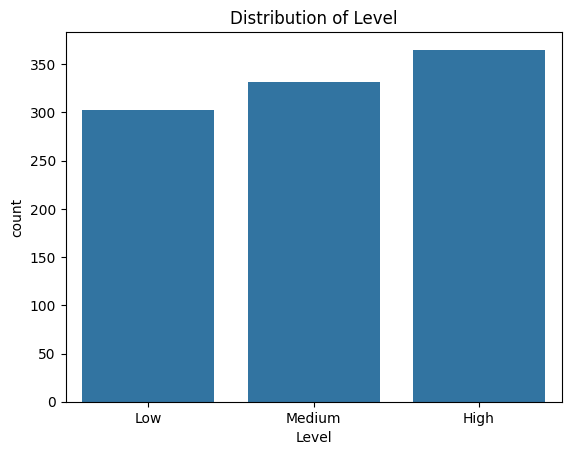


Missing values:
index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

Number of duplicate records:  0

Categorical columns: Index(['Patient Id', 'Level'], dtype='object')

Updated dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 9

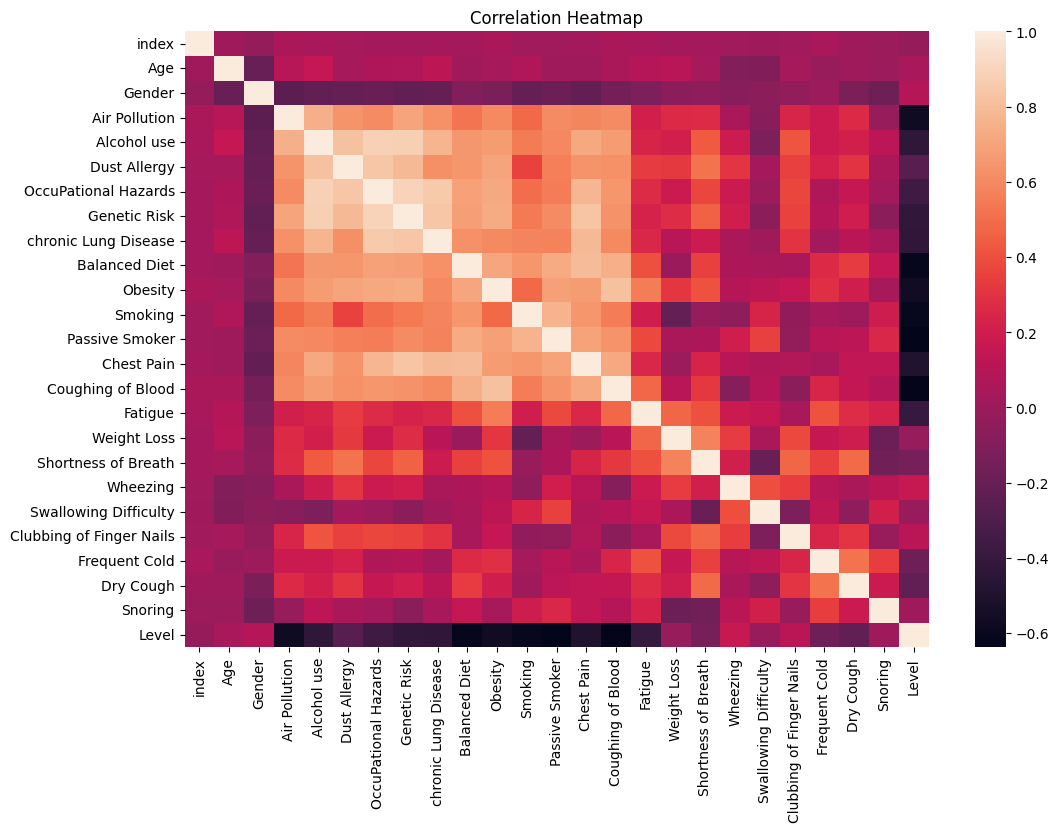


Selected features:
Index(['Level', 'Passive Smoker', 'Coughing of Blood', 'Balanced Diet',
       'Smoking'],
      dtype='object')

Results for euclidean distance:
Train Accuracy: 1.0
Validation Accuracy: 1.0
Test Accuracy: 1.0

Results for manhattan distance:
Train Accuracy: 1.0
Validation Accuracy: 1.0
Test Accuracy: 1.0


In [15]:
#Task 3

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('cancer patient data sets.csv')

print(df.head())
print(df.describe())

print("\nDistribution of 'Level':")
print(df['Level'].value_counts())

sns.countplot(x='Level', data=df)
plt.title('Distribution of Level')
plt.show()

print("\nMissing values:")
print(df.isnull().sum())

print("\nNumber of duplicate records: ", df.duplicated().sum())
df = df.drop_duplicates()

categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical columns:", categorical_cols)
label_encoder = LabelEncoder()
df['Level'] = label_encoder.fit_transform(df['Level'])

print("\nUpdated dataset:")
df.info()


df2 = df.drop(columns=['Patient Id']) 
corr_matrix = df2.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


threshold = 0.6
target_correlation = corr_matrix['Level'].abs().sort_values(ascending=False)
selected_features = target_correlation[target_correlation > threshold].index

print("\nSelected features:")
print(selected_features)



from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


scaler = MinMaxScaler()

X = df.drop(columns=['Patient Id', 'Level'])
y = df['Level']

X_scaled = scaler.fit_transform(X)

X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=0)


def evaluate_knn(metric):
    knn = KNeighborsClassifier(metric=metric)
    knn.fit(X_train, y_train)
    
    y_train_pred = knn.predict(X_train)
    y_val_pred = knn.predict(X_val)
    y_test_pred = knn.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    return train_acc, val_acc, test_acc

metrics = ['euclidean', 'manhattan']
results = {}

for metric in metrics:
    train_acc, val_acc, test_acc = evaluate_knn(metric)
    results[metric] = {
        'Train Accuracy': train_acc,
        'Validation Accuracy': val_acc,
        'Test Accuracy': test_acc
    }

for metric, metric_results in results.items():
    print(f"\nResults for {metric} distance:")
    print(f"Train Accuracy: {metric_results['Train Accuracy']}")
    print(f"Validation Accuracy: {metric_results['Validation Accuracy']}")
    print(f"Test Accuracy: {metric_results['Test Accuracy']}")
